In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN 
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA:

In [3]:
crime.shape

(50, 5)

In [4]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


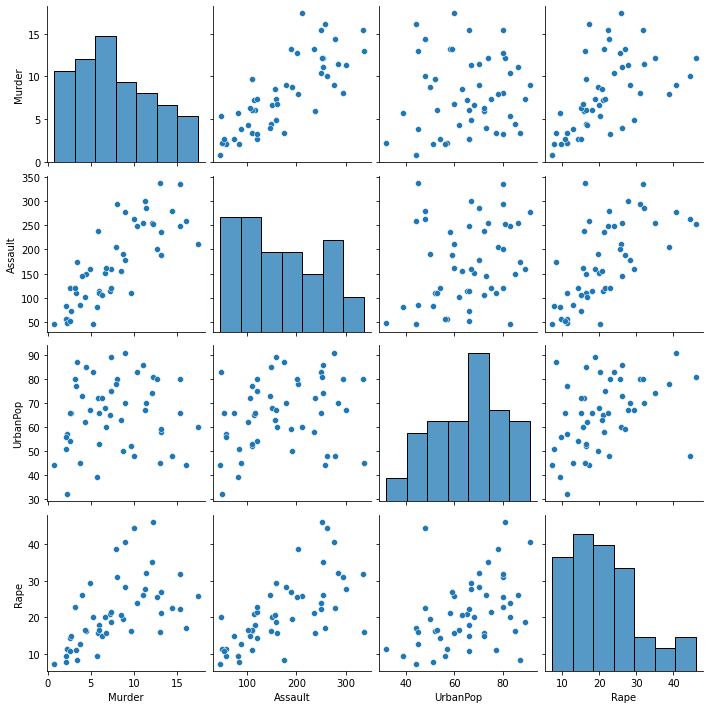

In [8]:
sns.pairplot(crime)

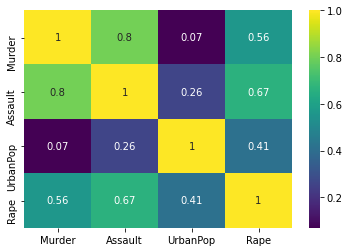

In [9]:
corr=crime.corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

In [10]:
#Encoding
le=LabelEncoder()
crime['Unnamed: 0']=le.fit_transform(crime['Unnamed: 0'])
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


### Scaling the Data

In [11]:
scaled=MinMaxScaler()
crime_scaled=scaled.fit_transform(crime)
pd.DataFrame(crime_scaled,columns=crime.columns)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


### CLUSTERING
### Hierarchical

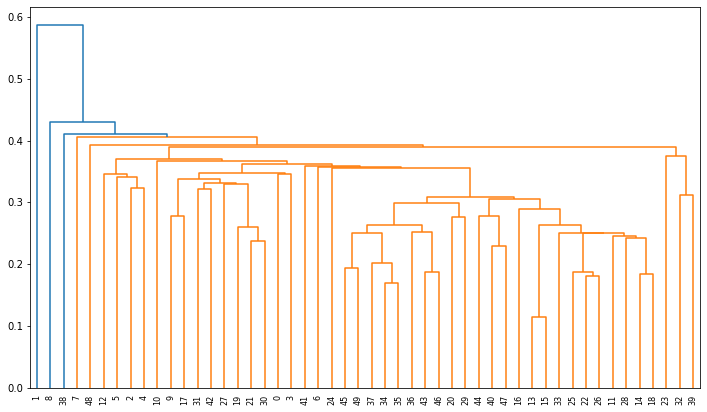

In [12]:
#Dendrogram
plt.figure(figsize=(12,7))
dg=sch.dendrogram(sch.linkage(crime_scaled,method='single'))

In [13]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean')
y_hc=hc.fit_predict(crime_scaled)
y_hc

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
hc_cluster=pd.DataFrame(y_hc,columns=['hc_cluster'])
hc_cluster

,hc_cluster
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


In [15]:
crime['hc_cluster']=hc_cluster
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster
0,0,13.2,236,58,21.2,1
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,1
3,3,8.8,190,50,19.5,1
4,4,9.0,276,91,40.6,1
5,5,7.9,204,78,38.7,1
6,6,3.3,110,77,11.1,0
7,7,5.9,238,72,15.8,1
8,8,15.4,335,80,31.9,1
9,9,17.4,211,60,25.8,1


In [16]:
crime[crime['hc_cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster
0,0,13.2,236,58,21.2,1
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,1
3,3,8.8,190,50,19.5,1
4,4,9.0,276,91,40.6,1
5,5,7.9,204,78,38.7,1
7,7,5.9,238,72,15.8,1
8,8,15.4,335,80,31.9,1
9,9,17.4,211,60,25.8,1
12,12,10.4,249,83,24.0,1


In [17]:
crime[crime['hc_cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster
6,6,3.3,110,77,11.1,0
10,10,5.3,46,83,20.2,0
11,11,2.6,120,54,14.2,0
13,13,7.2,113,65,21.0,0
14,14,2.2,56,57,11.3,0
15,15,6.0,115,66,18.0,0
16,16,9.7,109,52,16.3,0
18,18,2.1,83,51,7.8,0
20,20,4.4,149,85,16.3,0
22,22,2.7,72,66,14.9,0


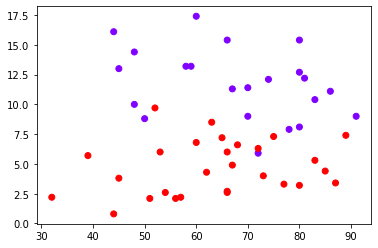

In [18]:
plt.scatter(crime['UrbanPop'],crime['Murder'],c=hc.labels_,cmap=plt.cm.rainbow_r)
plt.show()

### K Mean

#### 1.Elbow Method

In [19]:
inertia=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=99)
    model=model.fit(crime_scaled)
    inertia.append(model.inertia_)
inertia

[17.520857244133992,
 10.325376650233052,
 8.55263021053388,
 7.07949619388731,
 5.781201519121634,
 5.157189216582682,
 4.598615717659786,
 4.150988045735768,
 3.8442257091742666,
 3.4480909964224318]

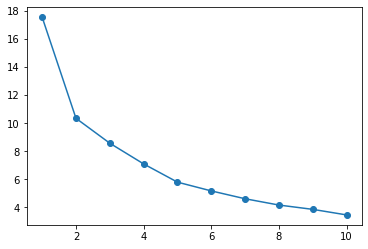

In [20]:
plt.scatter(range(1,11),inertia)
plt.plot(range(1,11),inertia)
plt.show()


#### Elbow method gives number of clusters as 2

### 2.Silhouette Score

In [21]:
sil_value=[]
for i in range(2,11):
    model1=KMeans(n_clusters=i,random_state=12)
    model1=model1.fit_predict(crime_scaled)
    sil_value.append(silhouette_score(crime_scaled,model1))
sil_value

[0.3451078069696669,
 0.2647249823391027,
 0.2747619069999468,
 0.27548866113737397,
 0.24844545844953658,
 0.27739687592465434,
 0.25864275479952864,
 0.2452797565954187,
 0.23002427188755287]

In [22]:
max(sil_value)

0.3451078069696669

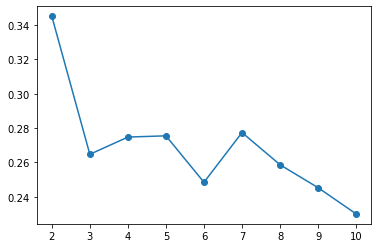

In [25]:
plt.scatter(range(2,11),sil_value)
plt.plot(range(2,11),sil_value)
plt.show()

### Silhouettee score says optimal number of cluster is 2

### 3.Calinski harabasz score

In [26]:
cal_value=[]
for i in range(2,10):
    model2=KMeans(n_clusters=i,random_state=99)
    model2=model2.fit_predict(crime_scaled)
    cal_value.append(calinski_harabasz_score(crime_scaled,model2))
cal_value

[33.449924415052664,
 24.641932376548624,
 22.61472639470484,
 22.844927039743684,
 21.096817291987215,
 20.138538049777946,
 19.32533033256914,
 18.233252134335373]

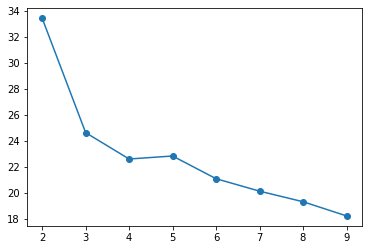

In [27]:
plt.plot(range(2,10),cal_value)
plt.scatter(range(2,10),cal_value)
plt.show()

### calinski harabasz score says optimal number of cluster is 2

In [41]:
crime_kmean=KMeans(n_clusters=2,random_state=99)
crime_kmean=crime_kmean.fit_predict(crime_scaled)
crime_kmean

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
cluster_kmean=pd.DataFrame(crime_kmean,columns=['cluster_kmean'])
cluster_kmean

,cluster_kmean
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


In [43]:
crime['cluster_kmean']=cluster_kmean
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster,cluster_kmean
0,0,13.2,236,58,21.2,1,1
1,1,10.0,263,48,44.5,1,1
2,2,8.1,294,80,31.0,1,1
3,3,8.8,190,50,19.5,1,1
4,4,9.0,276,91,40.6,1,1
5,5,7.9,204,78,38.7,1,1
6,6,3.3,110,77,11.1,0,0
7,7,5.9,238,72,15.8,1,1
8,8,15.4,335,80,31.9,1,1
9,9,17.4,211,60,25.8,1,1


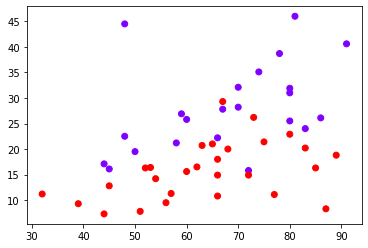

In [44]:
plt.scatter(crime['UrbanPop'],crime['Rape'],c=crime_kmean,cmap=plt.cm.rainbow_r)
plt.show()

### DBSCAN

In [53]:
cluster_db=DBSCAN(min_samples=3,eps=0.3)
cluster=cluster_db.fit_predict(crime_scaled)
cluster

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0,  1,  2,  1,  0, -1, -1,  0,  0, -1,  0,  2,  1, -1, -1,  0,
        2,  2,  2,  2, -1, -1,  3, -1, -1,  2,  3,  2,  2,  3, -1,  2],
      dtype=int64)

In [56]:
cluster_db=pd.DataFrame(cluster,columns=['cluster_db'])
cluster_db

,cluster_db
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [57]:
crime['cluster_db']=cluster_db
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster,cluster_kmean,cluster_db
0,0,13.2,236,58,21.2,1,1,-1
1,1,10.0,263,48,44.5,1,1,-1
2,2,8.1,294,80,31.0,1,1,-1
3,3,8.8,190,50,19.5,1,1,-1
4,4,9.0,276,91,40.6,1,1,-1
5,5,7.9,204,78,38.7,1,1,-1
6,6,3.3,110,77,11.1,0,0,-1
7,7,5.9,238,72,15.8,1,1,-1
8,8,15.4,335,80,31.9,1,1,-1
9,9,17.4,211,60,25.8,1,1,-1


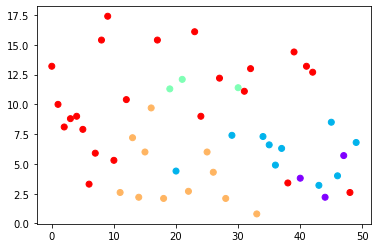

In [63]:
plt.scatter(crime['Unnamed: 0'],crime['Murder'],c=cluster,cmap=plt.cm.rainbow_r)
plt.show()